# Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season, etc.

## Objectives

* Perform Exploratory data analysis and create visualizations.
* Implement linear regression using sklearn and implement different optimization techniques.
* Apply regularization techniques - Lasso, Ridge and Elasticnet
* Calculate and compare the MSE value of each regression technique
* Analyze the features and comment on the features that are best contributing to the target

### Dataset

Fanaee-T,Hadi. (2013). Bike Sharing Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5W894.

[Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  
This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

Dataset Characteristics:
Univariate

Subject Area:
Social Science

Associated Tasks:
Regression

Feature Type:
Integer, Real

### Instances
17389

### Features
16

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

### Data Fields

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
	- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

In [ ]:
#@title Download the dataset
!wget -qq https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
!unzip bike+sharing+dataset.zip

Archive:  bike+sharing+dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Data Loading

In [ ]:
# Reading the hour.csv file into a dataframe

df = pd.read_csv('hour.csv')

In [ ]:
# Printing first five rows of dataframe to have a look
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [ ]:
# Checking the summary of the dataframe
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [ ]:
# Checking the field data types
print(df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


### Rough Workflow

- Explore and analyze the data

- Identify continuous features and categorical features

- Apply one-hot encoding on categorical features and scaling on continuous features

- Separate the features, targets and split the data into train and test datasets

- Find the coefficients of the features using normal equation and find the cost (error)

- Apply batch gradient descent technique and find the best coefficients

- Apply SGD Regressor using sklearn

- Apply Linear regression using sklearn

- Apply Lasso, Ridge, Elasticnet Regression

#### Visualizing the hour (hr) column to find the busy hours of bike sharing

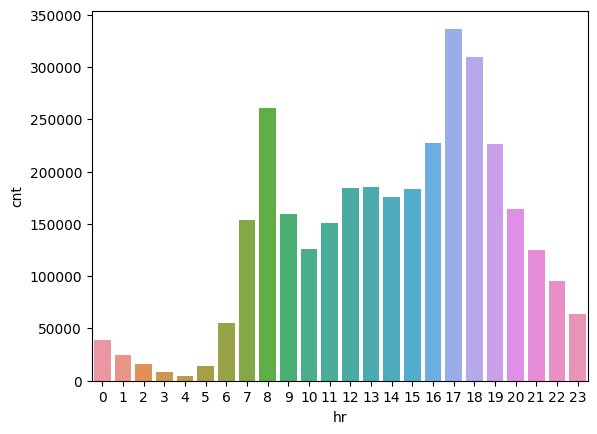

In [ ]:
hour = df[['hr','cnt']].groupby('hr').sum()

sns.barplot(x=df['hr'], y= hour['cnt']);

Comments: Peak hours are 6pm followed by 5pm. A spike can be seen in the morning around 8. Major bike usage is during office hours. Early Morning or late night causes usage to drop.


#### Visualizing the distribution of count, casual and registered variables for different type of users

<Axes: xlabel='cnt', ylabel='Count'>

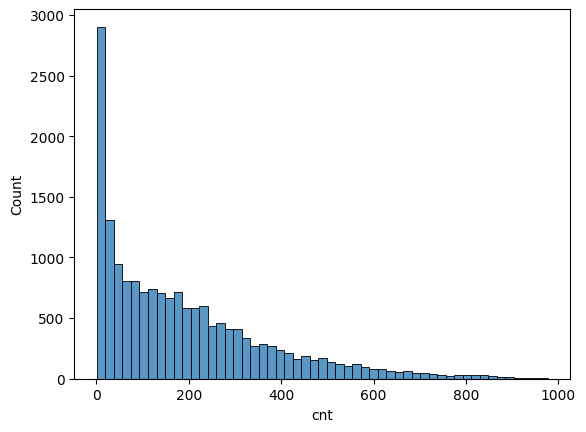

In [ ]:
sns.histplot(x=df['cnt'])

<Axes: xlabel='casual', ylabel='Count'>

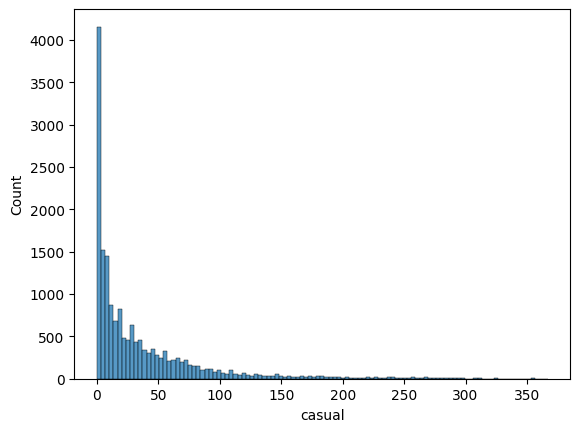

In [ ]:
sns.histplot(x=df['casual'])

<Axes: xlabel='registered', ylabel='Count'>

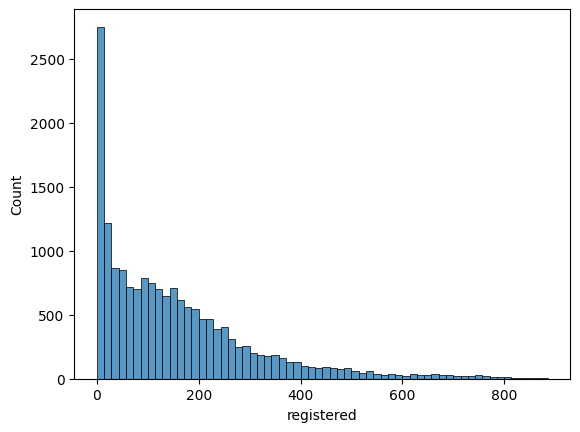

In [ ]:
sns.histplot(x=df['registered'])

Comments: Registered users are more compared to Casual users. Count and Registered together make up the whole uers count.

#### Trying to draw the relation of weekday, holiday and working day using visualisations

In [ ]:
df.weekday.unique(), df.holiday.unique(), df.workingday.unique()

(array([6, 0, 1, 2, 3, 4, 5]), array([0, 1]), array([0, 1]))

<Axes: xlabel='weekday', ylabel='holiday'>

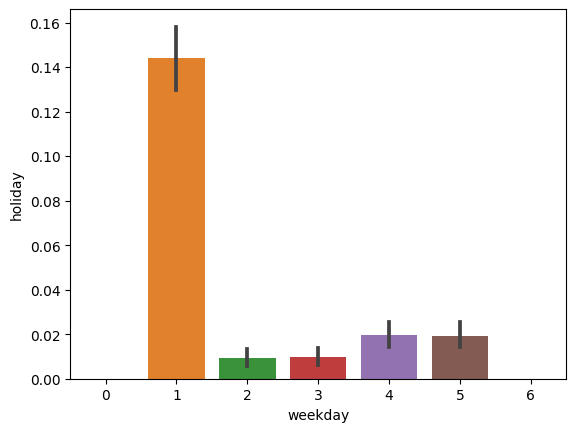

In [ ]:
sns.barplot(y=df['holiday'], x =df['weekday'])

<Axes: xlabel='weekday', ylabel='workingday'>

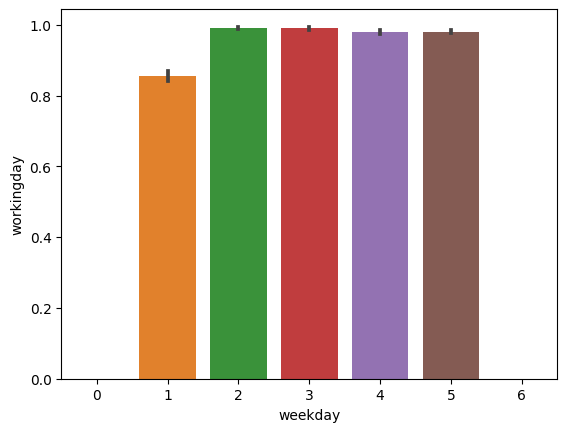

In [ ]:
sns.barplot(y=df['workingday'], x =df['weekday'])

In [ ]:
hol = df['holiday'].value_counts()
work = df['workingday'].value_counts()
week = df['weekday'].value_counts()

hol[1] + work[1] == week[1] + week[2] + week[3] + week[4] + week[5]

True

Comment: Weekdays 1,2,3,4,5 is the sum of days where working day is 1 & Holiday is 1.

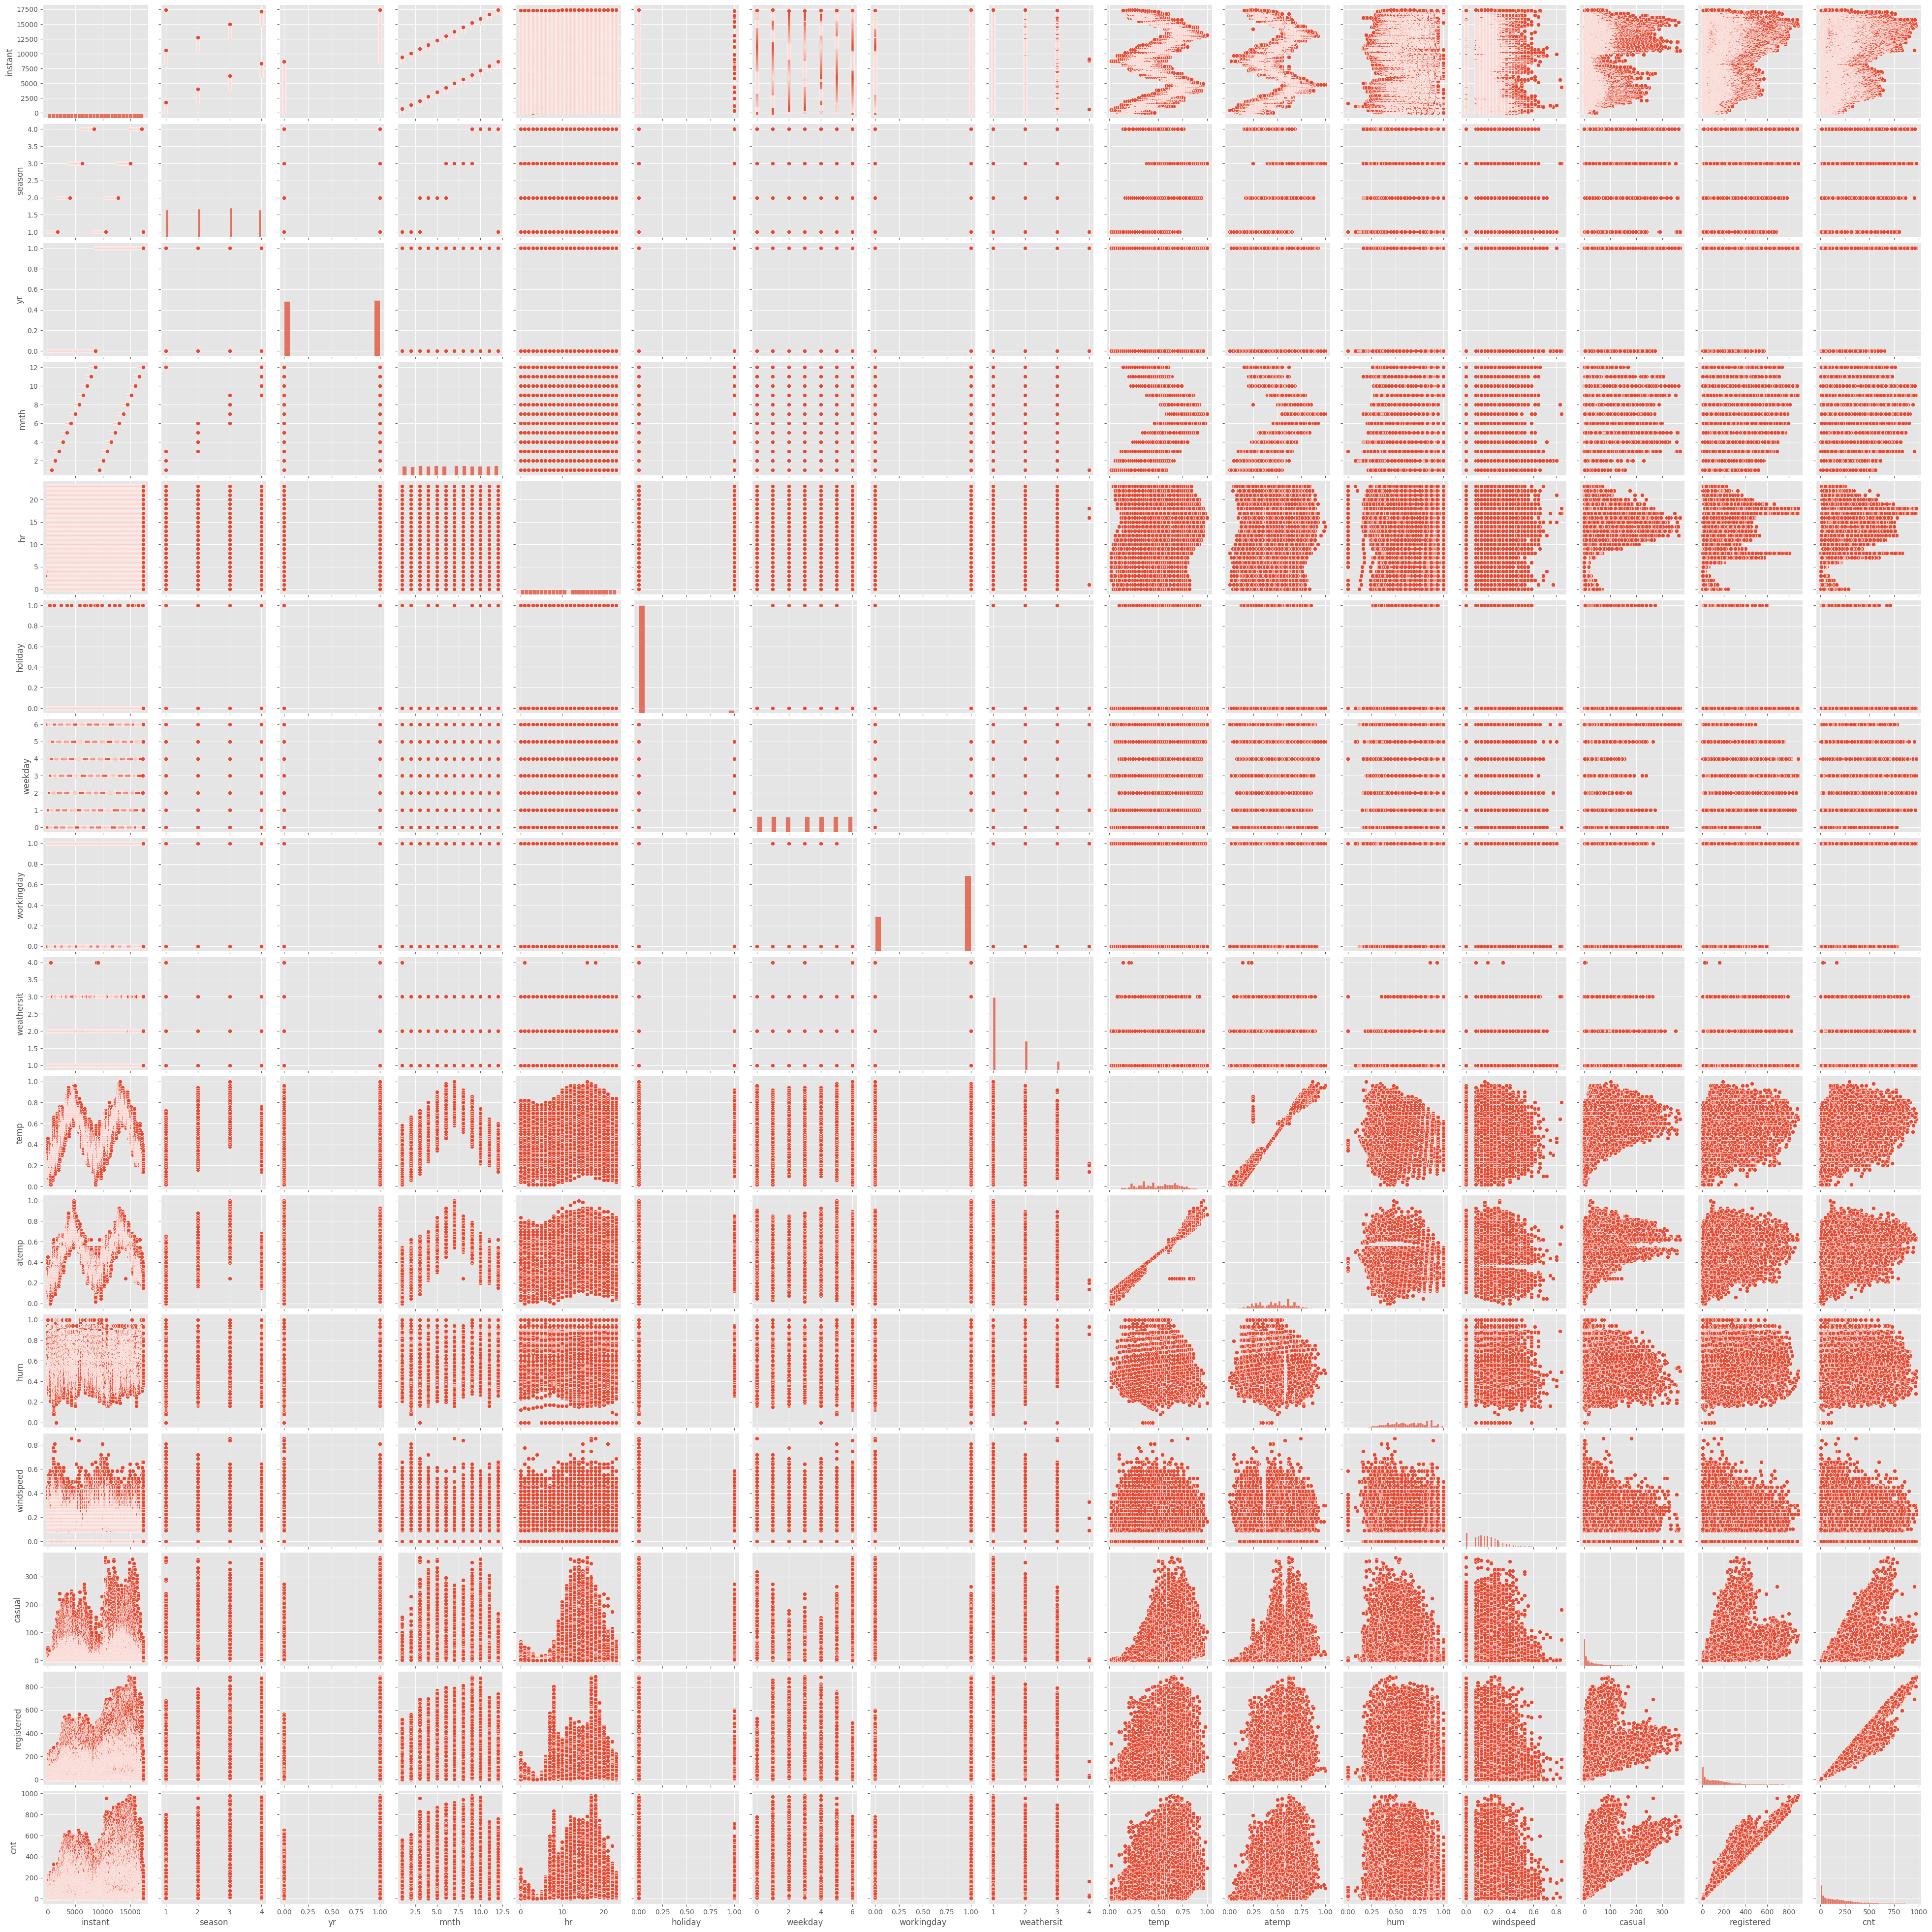

In [ ]:
#Plotting a pairplot to check relationships between variables
plt.style.use('ggplot')
sns.pairplot(df)

#### Visualizing the month wise count of both casual and registered variables for the year 2011 and 2012.


In [ ]:
df.mnth.unique(), df.yr.unique()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([0, 1]))

In [ ]:
user_year_0 = df[df['yr'] == 0][['mnth','casual', 'registered']].copy()
user_year_1 = df[df['yr'] == 1][['mnth','casual', 'registered']].copy()

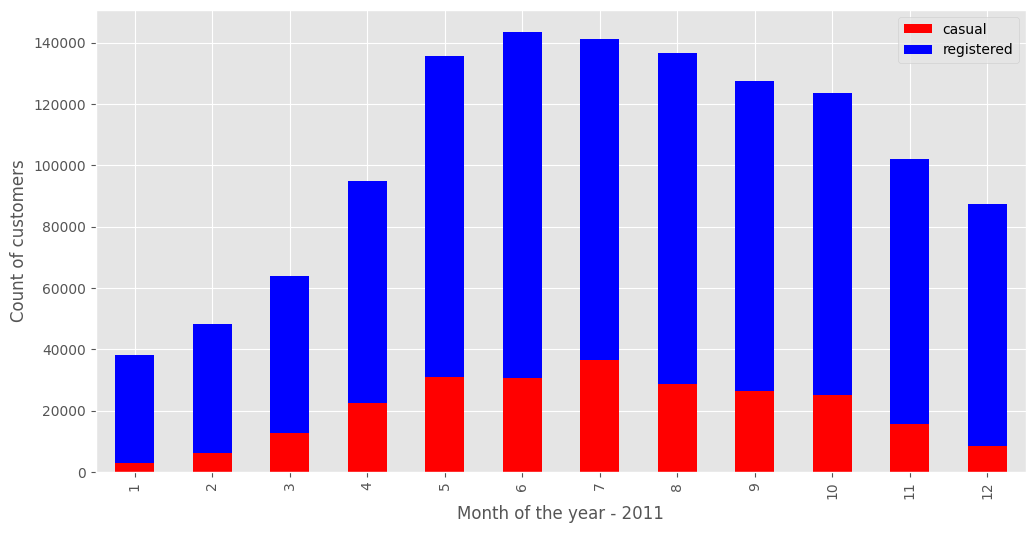

In [ ]:
# Stacked bar chart for year 2011
eleven = user_year_0.set_index('mnth')
eleven_1 = eleven.groupby('mnth').sum()

eleven_1.plot(kind= 'bar', stacked= True, figsize=(12,6), color=['red', 'blue'])
plt.xlabel('Month of the year - 2011')
plt.ylabel('Count of customers')
plt.show()

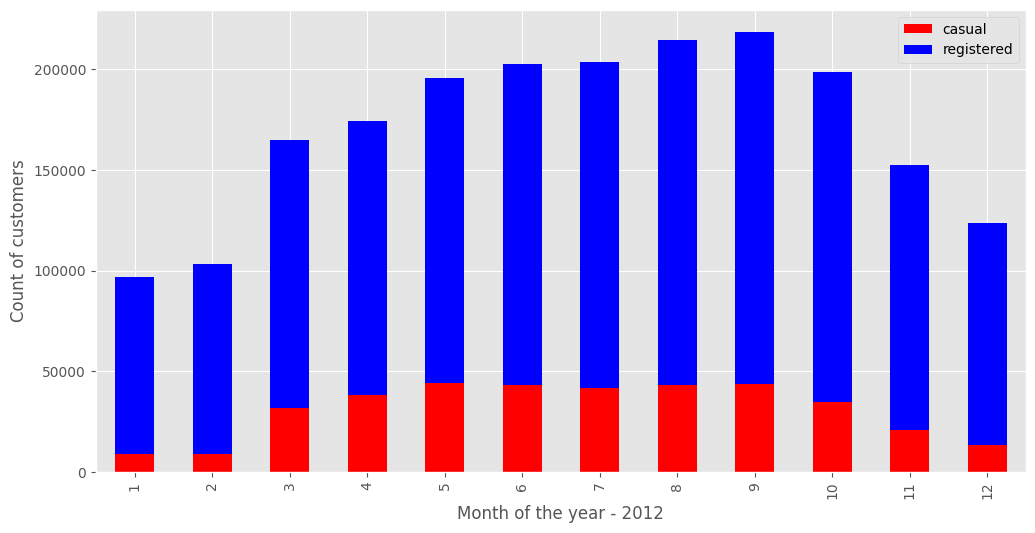

In [ ]:
# Stacked bar chart for year 2012

twelve = user_year_1.set_index('mnth')
twelve_1 = twelve.groupby('mnth').sum()

twelve_1.plot(kind= 'bar', stacked= True, figsize=(12,6), color=['red', 'blue'])
plt.xlabel('Month of the year - 2012')
plt.ylabel('Count of customers')
plt.show()

Comments: The number of users are more in the months 3-10 when temp is usually on the higher side. The number of users increased on y-o-y basis from 2011 to 2012.

There is an increase in number of registered users from 2011 to 2012, but not very significant increase in the casual users.

#### Analyze the correlation between features with heatmap

<ipython-input-20-4a96977ff9c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidth=0.5, center=0, vmin = -1, vmax= 1, cmap = 'icefire')


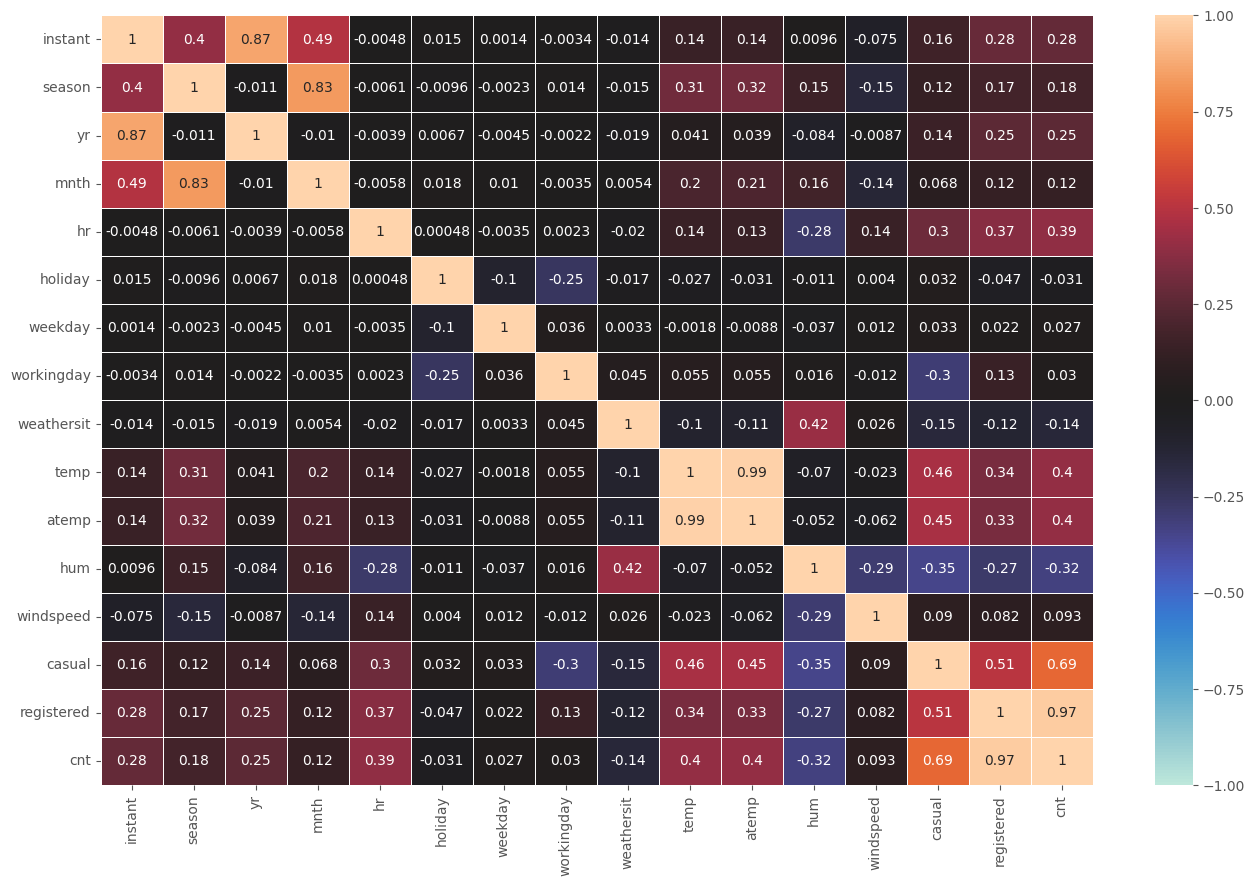

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, center=0, vmin = -1, vmax= 1, cmap = 'icefire')
plt.show()

Comment: We see that temp, atemp, hr, hum, weathersit are significant features impacting cnt.

Also temp and atemp are multicollinear. So we can use either to decrease one feature.

#### Visualize the box plot of casual and registered variables to check the outliers

In [ ]:
df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

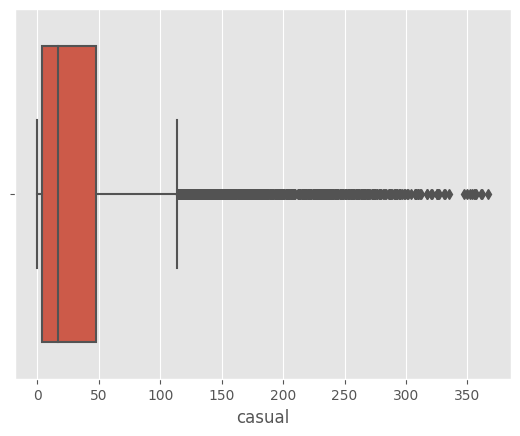

In [ ]:
sns.boxplot(x=df.casual);

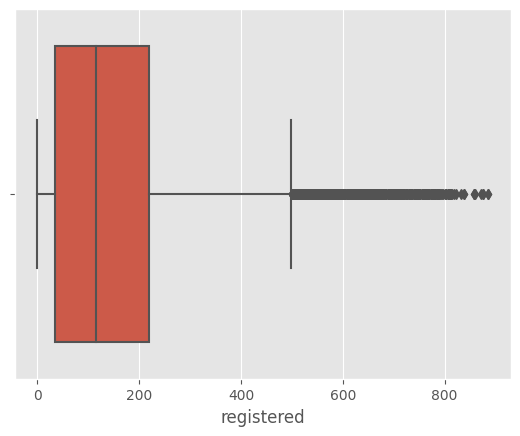

In [ ]:
sns.boxplot(x=df.registered);

In [ ]:
def percentage_outlier(x):
    iqr = df[x].quantile(0.75)-df[x].quantile(0.25)
    HL = df[x].quantile(0.75)+iqr*1.5
    LL = df[x].quantile(0.25)-iqr*1.5
    per_outlier = ((df[x]<LL).sum()+(df[x]>HL).sum())/len(df[x])*100
    per_outlier = round(per_outlier,2)
    return(per_outlier)

In [ ]:
print('Percentage of outlier (casual): ', percentage_outlier('casual'))
print('Percentage of outlier (registered): ', percentage_outlier('registered'))

Percentage of outlier (casual):  6.86
Percentage of outlier (registered):  3.91


Comments: Outliers are present. This might be due to some particular hours seeing abrupt rise in the number of users.

Outliers are more in casual users.

### Data Pre-processing and Engineering

#### Dropping unwanted columns

In [ ]:
df1 = df.copy()

df1.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

Comments: We are dropping below columns -

Instant - are just indexes not used;
atemp - Closely correlated to temp;
dteday - Object field, we are using hour and month, so it is redundant;
casual, registered - they both make up the variable cnt.

In [ ]:
df1.drop(['instant','atemp','dteday','casual','registered'],axis=1,inplace=True)

In [ ]:
x = df1.drop(['cnt'],axis=1)
y = df1['cnt']

x.head()

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1   0        0        6           0           1  0.24  0.81   
1       1   0     1   1        0        6           0           1  0.22  0.80   
2       1   0     1   2        0        6           0           1  0.22  0.80   
3       1   0     1   3        0        6           0           1  0.24  0.75   
4       1   0     1   4        0        6           0           1  0.24  0.75   

   windspeed  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

#### Identifying categorical and continuous variables


In [ ]:
categorical_var = ['season','yr','mnth','hr','holiday','weekday', 'workingday','weathersit']
numerical_var = ['temp', 'hum','windspeed']

In [ ]:
display('Season',df1['season'].value_counts())
display('Year', df1['yr'].value_counts())
display('month', df1['mnth'].value_counts())
display('hr', df1['hr'].value_counts().sort_values())
display('holiday', df1['holiday'].value_counts())
display('weekday', df1['weekday'].value_counts())
display('working', df1['workingday'].value_counts())
display('weathersit', df1['weathersit'].value_counts())

'Season'

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

'Year'

1    8734
0    8645
Name: yr, dtype: int64

'month'

5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: mnth, dtype: int64

'hr'

3     697
4     697
2     715
5     717
1     724
6     725
0     726
7     727
8     727
9     727
10    727
11    727
23    728
19    728
20    728
21    728
22    728
12    728
18    728
14    729
15    729
13    729
16    730
17    730
Name: hr, dtype: int64

'holiday'

0    16879
1      500
Name: holiday, dtype: int64

'weekday'

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

'working'

1    11865
0     5514
Name: workingday, dtype: int64

'weathersit'

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

In [ ]:
df1['weekday'] = df1['weekday'].astype(str)
df1['season'] = df1['season'].astype(str)
df1['mnth'] = df1['mnth'].astype(str)
df1['hr'] = df1['hr'].astype(str)
df1['weathersit'] = df1['weathersit'].astype(str)


In [ ]:
df1['yr'] = df1['yr'].astype(int)
df1['holiday'] = df1['holiday'].astype(int)
df1['workingday'] = df1['workingday'].astype(int)

#### Feature scaling


In [ ]:
df4 = df1.copy()

In [ ]:
scaler = StandardScaler()
df4[numerical_var] = scaler.fit_transform(df4[numerical_var])
df4.head()

season  yr mnth hr  holiday weekday  workingday weathersit      temp  \
0      1   0    1  0        0       6           0          1 -1.334648   
1      1   0    1  1        0       6           0          1 -1.438516   
2      1   0    1  2        0       6           0          1 -1.438516   
3      1   0    1  3        0       6           0          1 -1.334648   
4      1   0    1  4        0       6           0          1 -1.334648   

        hum  windspeed  cnt  
0  0.947372  -1.553889   16  
1  0.895539  -1.553889   40  
2  0.895539  -1.553889   32  
3  0.636370  -1.553889   13  
4  0.636370  -1.553889    1

In [ ]:
df1.head()

season  yr mnth hr  holiday weekday  workingday weathersit  temp   hum  \
0      1   0    1  0        0       6           0          1  0.24  0.81   
1      1   0    1  1        0       6           0          1  0.22  0.80   
2      1   0    1  2        0       6           0          1  0.22  0.80   
3      1   0    1  3        0       6           0          1  0.24  0.75   
4      1   0    1  4        0       6           0          1  0.24  0.75   

   windspeed  cnt  
0        0.0   16  
1        0.0   40  
2        0.0   32  
3        0.0   13  
4        0.0    1

Comments: Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

#### Applying one-hot encoding on the categorical data

In [ ]:
# USING PANDAS
df2 = pd.get_dummies(df1, columns= ['season','mnth','hr','weekday','weathersit'])
df2.shape
df2.head()
#df2.describe()

yr  holiday  workingday  temp   hum  windspeed  cnt  season_1  season_2  \
0   0        0           0  0.24  0.81        0.0   16         1         0   
1   0        0           0  0.22  0.80        0.0   40         1         0   
2   0        0           0  0.22  0.80        0.0   32         1         0   
3   0        0           0  0.24  0.75        0.0   13         1         0   
4   0        0           0  0.24  0.75        0.0    1         1         0   

   season_3  ...  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
0         0  ...          0          0          0          0          0   
1         0  ...          0          0          0          0          0   
2         0  ...          0          0          0          0          0   
3         0  ...          0          0          0          0          0   
4         0  ...          0          0          0          0          0   

   weekday_6  weathersit_1  weathersit_2  weathersit_3  weathersit_4  
0          1             1             0             0             0  
1          1             1             0             0             0  
2          1             1             0             0             0  
3          1             1             0             0             0  
4          1             1             0             0             0  

[5 rows x 58 columns]

In [ ]:
df2_columns = df2.columns.tolist()

In [ ]:
df2_columns

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'cnt',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'mnth_1',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'hr_0',
 'hr_1',
 'hr_10',
 'hr_11',
 'hr_12',
 'hr_13',
 'hr_14',
 'hr_15',
 'hr_16',
 'hr_17',
 'hr_18',
 'hr_19',
 'hr_2',
 'hr_20',
 'hr_21',
 'hr_22',
 'hr_23',
 'hr_3',
 'hr_4',
 'hr_5',
 'hr_6',
 'hr_7',
 'hr_8',
 'hr_9',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4']

In [ ]:
df5 = df1.copy()

In [ ]:
df5.head()

season  yr mnth hr  holiday weekday  workingday weathersit  temp   hum  \
0      1   0    1  0        0       6           0          1  0.24  0.81   
1      1   0    1  1        0       6           0          1  0.22  0.80   
2      1   0    1  2        0       6           0          1  0.22  0.80   
3      1   0    1  3        0       6           0          1  0.24  0.75   
4      1   0    1  4        0       6           0          1  0.24  0.75   

   windspeed  cnt  
0        0.0   16  
1        0.0   40  
2        0.0   32  
3        0.0   13  
4        0.0    1

In [ ]:
df5[['season','mnth','hr','weekday','weathersit']]

season mnth  hr weekday weathersit
0          1    1   0       6          1
1          1    1   1       6          1
2          1    1   2       6          1
3          1    1   3       6          1
4          1    1   4       6          1
...      ...  ...  ..     ...        ...
17374      1   12  19       1          2
17375      1   12  20       1          2
17376      1   12  21       1          1
17377      1   12  22       1          1
17378      1   12  23       1          1

[17379 rows x 5 columns]

In [ ]:
#Using SKLEARN
from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
drop_binary_enc = OneHotEncoder(drop='if_binary').fit(df5[['season','mnth','hr','weekday','weathersit']])

onehotlabels = drop_binary_enc.transform(df5[['season','mnth','hr','weekday','weathersit']]).toarray()
onehotlabels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(onehotlabels)

0    1    2    3    4    5    6    7    8    9   ...   41   42   43  \
0      1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
17374  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  0.0   
17375  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  0.0   
17376  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  0.0   
17377  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  0.0   
17378  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  1.0  0.0  0.0   

        44   45   46   47   48   49   50  
0      0.0  0.0  1.0  1.0  0.0  0.0  0.0  
1      0.0  0.0  1.0  1.0  0.0  0.0  0.0  
2      0.0  0.0  1.0  1.0  0.0  0.0  0.0  
3      0.0  0.0  1.0  1.0  0.0  0.0  0.0  
4      0.0  0.0  1.0  1.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
17374  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
17375  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
17376  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
17377  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
17378  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[17379 rows x 51 columns]

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that we cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

#### Specifying features and targets after applying scaling and one-hot encoding

In [ ]:
target_df = df2[['cnt']]
features_df = df2.drop('cnt', axis=1)

In [ ]:
print('Features which are available after one-hot encoding scaling:')
features_df.columns.tolist()

Features which are available after one-hot encoding scaling:


['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'mnth_1',
 'mnth_10',
 'mnth_11',
 'mnth_12',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_9',
 'hr_0',
 'hr_1',
 'hr_10',
 'hr_11',
 'hr_12',
 'hr_13',
 'hr_14',
 'hr_15',
 'hr_16',
 'hr_17',
 'hr_18',
 'hr_19',
 'hr_2',
 'hr_20',
 'hr_21',
 'hr_22',
 'hr_23',
 'hr_3',
 'hr_4',
 'hr_5',
 'hr_6',
 'hr_7',
 'hr_8',
 'hr_9',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3',
 'weathersit_4']

In [ ]:
print('Targets which are available after one-hot encoding scaling')
target_df.columns.tolist()

Targets which are available after one-hot encoding scaling


['cnt']

### Implementing linear regression by finding the coefficients using below approach
- Finding the coefficients using normal equation
- Using SKLEARN
- (To be checked in future versions) Batch gradient descent
- (To be checked in future versions) SGD Regressor from sklearn

#### Selecting the features and target and splitting the dataset

As there are 3 target user variables, we choose the count (`cnt`) variable as our target which contains information of other two.

In [ ]:
target_df.head()

cnt
0   16
1   40
2   32
3   13
4    1

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

To solve the normal equation we compute least-squares solution using `scipy.linalg`

In [ ]:
import scipy
from scipy.linalg import lstsq

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.20, random_state=42, shuffle=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 335 to 15795
Data columns (total 57 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            13903 non-null  int64  
 1   holiday       13903 non-null  int64  
 2   workingday    13903 non-null  int64  
 3   temp          13903 non-null  float64
 4   hum           13903 non-null  float64
 5   windspeed     13903 non-null  float64
 6   season_1      13903 non-null  uint8  
 7   season_2      13903 non-null  uint8  
 8   season_3      13903 non-null  uint8  
 9   season_4      13903 non-null  uint8  
 10  mnth_1        13903 non-null  uint8  
 11  mnth_10       13903 non-null  uint8  
 12  mnth_11       13903 non-null  uint8  
 13  mnth_12       13903 non-null  uint8  
 14  mnth_2        13903 non-null  uint8  
 15  mnth_3        13903 non-null  uint8  
 16  mnth_4        13903 non-null  uint8  
 17  mnth_5        13903 non-null  uint8  
 18  mnth_6        13903 non-

In [ ]:
X_train.shape

(13903, 57)

In [ ]:
p, res, rnk, s = lstsq(X_train.to_numpy(),y_train.to_numpy())
#p

In [ ]:
p

array([[ 8.58369300e+01],
       [ 1.18544260e+15],
       [ 1.18544260e+15],
       [ 2.27000828e+02],
       [-8.06274163e+01],
       [-3.81342318e+01],
       [ 7.31035918e+14],
       [ 7.31035918e+14],
       [ 7.31035918e+14],
       [ 7.31035918e+14],
       [-3.20089347e+14],
       [-3.20089347e+14],
       [-3.20089347e+14],
       [-3.20089347e+14],
       [-3.20089347e+14],
       [-3.20089347e+14],
       [-3.20089347e+14],
       [-3.20089347e+14],
       [-3.20089347e+14],
       [-3.20089347e+14],
       [-3.20089347e+14],
       [-3.20089347e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.56495599e+14],
       [-3.5

θ=(XTX)−1.(XTY)

In [ ]:
#second option to find theta
#X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_train.to_numpy().T.dot(X_train.to_numpy())).dot(X_train.to_numpy().T).dot(y_train)
theta_best

array([[-3.16384124e+03],
       [-3.02834791e+17],
       [-3.02834791e+17],
       [ 1.13283462e+04],
       [ 1.60393268e+03],
       [-1.50956504e+04],
       [-1.44851700e+16],
       [-1.44851700e+16],
       [-1.44851700e+16],
       [-1.44851700e+16],
       [ 1.78845909e+17],
       [ 1.78845909e+17],
       [ 1.78845909e+17],
       [ 1.78845909e+17],
       [ 1.78845909e+17],
       [ 1.78845909e+17],
       [ 1.78845909e+17],
       [ 1.78845909e+17],
       [ 1.78845909e+17],
       [ 1.78845909e+17],
       [ 1.78845909e+17],
       [ 1.78845909e+17],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.77212774e+16],
       [ 6.7

#### (Future versions) Implementing Linear regression using batch gradient descent

Initializing the random coefficients and optimizing the coefficients in the iterative process by calculating cost and finding the gradient.

#### (Future versions) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

Steps:
- Import SGDRegressor from sklearn and fit the data
- Predict the test data and find the error

### Implementing Linear regression using sklearn

In [ ]:
'''from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

'''

'from sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LinearRegression\n\nlm = LinearRegression()\nlm.fit(X_train, y_train)\n\nrfe = RFE(lm, n_features_to_select = 15)\nrfe = rfe.fit(X_train, y_train)\n\n'

In [ ]:
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
#col = X_train.columns[rfe.support_]


In [ ]:
#X_train.columns[rfe.support_]

In [ ]:
#X_train.drop(columns=['season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1','holiday_0', 'holiday_1', 'weekday_0', 'weekday_6', 'workingday_0',  'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'], inplace=True)


In [ ]:
#X_train.shape

In [ ]:
#X_test.drop(columns=['season_1', 'season_2', 'season_3', 'season_4', 'yr_0', 'yr_1', 'holiday_0', 'holiday_1', 'weekday_0', 'weekday_6', 'workingday_0', 'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'], inplace=True)


In [ ]:
X_train.head()

yr  holiday  workingday  temp   hum  windspeed  season_1  season_2  \
335    0        0           0  0.20  0.55     0.2239         1         0   
7035   0        0           1  0.52  0.42     0.1045         0         0   
8051   0        0           1  0.46  1.00     0.2239         0         0   
2133   0        0           0  0.46  0.31     0.0000         0         1   
8485   0        0           0  0.20  0.75     0.1045         1         0   

      season_3  season_4  ...  weekday_1  weekday_2  weekday_3  weekday_4  \
335          0         0  ...          0          0          0          0   
7035         0         1  ...          0          1          0          0   
8051         0         1  ...          0          0          1          0   
2133         0         0  ...          0          0          0          0   
8485         0         0  ...          0          0          0          0   

      weekday_5  weekday_6  weathersit_1  weathersit_2  weathersit_3  \
335           0          1             1             0             0   
7035          0          0             1             0             0   
8051          0          0             0             0             1   
2133          0          0             0             1             0   
8485          0          0             1             0             0   

      weathersit_4  
335              0  
7035             0  
8051             0  
2133             0  
8485             0  

[5 rows x 57 columns]

In [ ]:
#X_train_rfe = X_train[col]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.20, random_state= 42)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('predicted data', pred)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

predicted data [[461.5]
 [163.5]
 [  6.5]
 ...
 [ 90.5]
 [203.5]
 [258.5]]
Mean Absolute Error: 74.20368239355581
Mean Squared Error: 10122.665995397008
Mean Root Squared Error: 100.61146055692168


#### Calculating the $R^2$ (coefficient of determination) of the actual and predicted data

In [ ]:
print('Coefficient of Determination:', r2_score(y_test, pred))

Coefficient of Determination: 0.6803241907127012


In [ ]:
lr.coef_

array([[ 8.58763937e+01,  2.78949837e+15,  2.78949837e+15,
         2.26096817e+02, -8.31977383e+01, -4.04640671e+01,
         2.44151385e+15,  2.44151385e+15,  2.44151385e+15,
         2.44151385e+15, -1.34153497e+14, -1.34153497e+14,
        -1.34153497e+14, -1.34153497e+14, -1.34153497e+14,
        -1.34153497e+14, -1.34153497e+14, -1.34153497e+14,
        -1.34153497e+14, -1.34153497e+14, -1.34153497e+14,
        -1.34153497e+14,  3.68795054e+14,  3.68795054e+14,
         3.68795054e+14,  3.68795054e+14,  3.68795054e+14,
         3.68795054e+14,  3.68795054e+14,  3.68795054e+14,
         3.68795054e+14,  3.68795054e+14,  3.68795054e+14,
         3.68795054e+14,  3.68795054e+14,  3.68795054e+14,
         3.68795054e+14,  3.68795054e+14,  3.68795054e+14,
         3.68795054e+14,  3.68795054e+14,  3.68795054e+14,
         3.68795054e+14,  3.68795054e+14,  3.68795054e+14,
         3.68795054e+14,  2.65340633e+15, -1.36092034e+14,
        -1.36092034e+14, -1.36092034e+14, -1.36092034e+1

In [ ]:
coeffs = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coeffs.columns = ['Features', 'Coefficients']

coeffs.head()

Features  Coefficients
0          yr  8.587639e+01
1     holiday  2.789498e+15
2  workingday  2.789498e+15
3        temp  2.260968e+02
4         hum -8.319774e+01

In [ ]:
lr.intercept_

array([-4.19961263e+15])

#### Summarizing the importance of features using the coefficients obtained through the sklearn Linear Regression implementation and creating a bar chart of the coefficients.

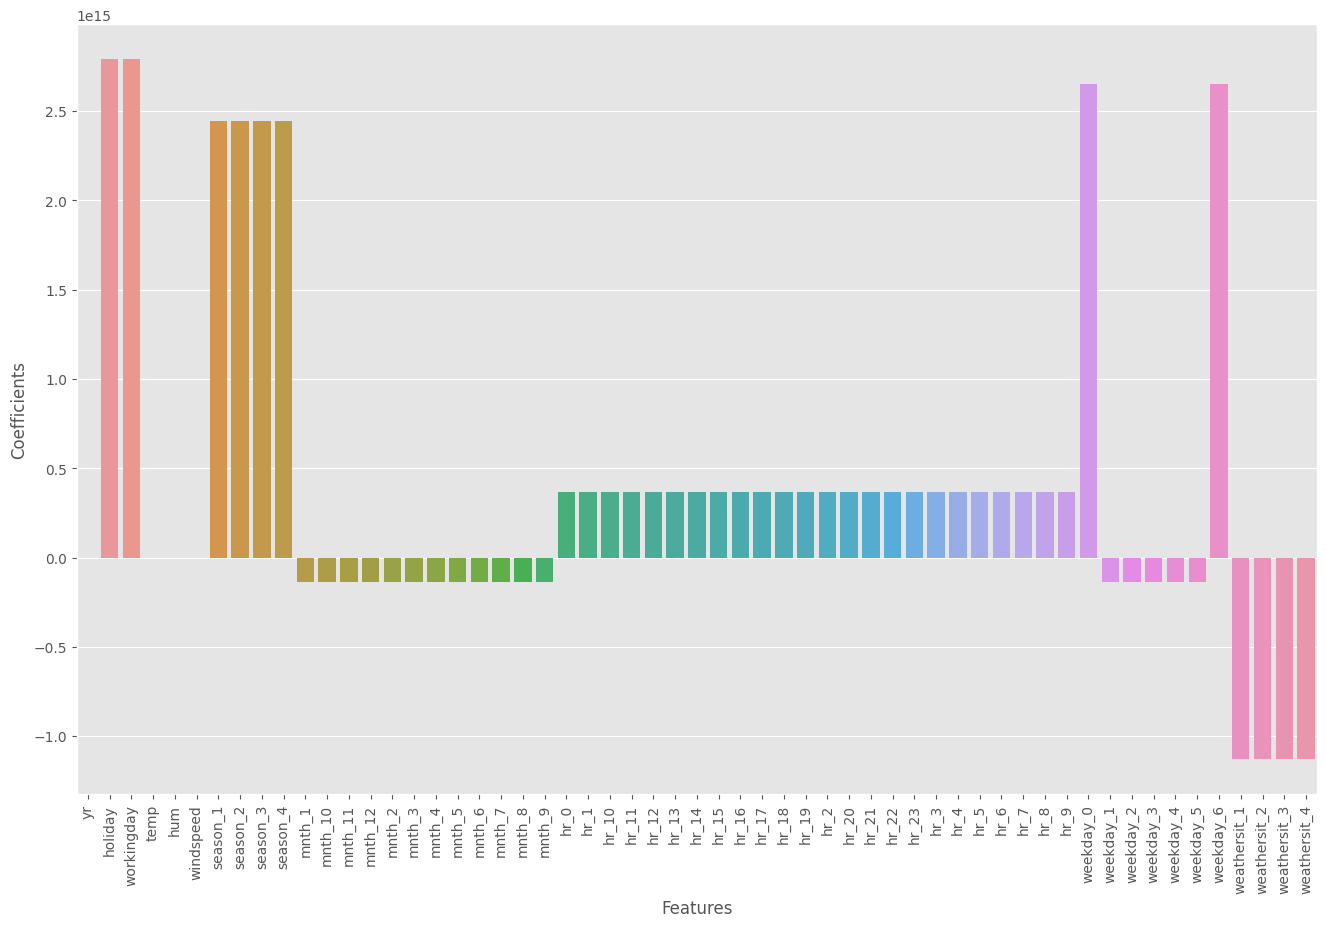

In [ ]:
plt.figure(figsize=(16, 10))
sns.barplot(x = coeffs.Features, y = coeffs.Coefficients)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
lr.coef_.shape

(1, 57)

Comments: Prediction is the weighted sum of the input values. Regularization, such as ridge regression and the elastic net, finds a set of coefficients to be used in the weighted sum to make a prediction. These coefficients can be used directly as a type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

### Applying Regularization methods - Lasso, Ridge, ElasticNet
* Applying different regression techniques with different alpha values and finding the best alpha that gives the least error.
* Calculating the metrics for the actual and predicted targets.

#### Lasso regression


In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [ ]:
from sklearn.linear_model import LassoCV, Lasso

#lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1],  max_iter = 50000, cv = 10)
lasso = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10, 100],  max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha_new = lasso.alpha_
print("Best alpha :", alpha_new)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha : 0.001


In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R-sq: 0.6810491371839791
MSE: 10099.71026718708
RMSE: 100.49731472625066


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.460e+06, tolerance: 4.616e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
y_train.shape

(13903, 1)

In [ ]:
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

In [ ]:
y_train.shape, y_train_las.shape, y_test.shape, y_test_las.shape

((13903, 1), (13903,), (3476, 1), (3476,))

In [ ]:
y_train_array =y_train.iloc[:,:].values.reshape((13903,))
y_train_array.shape

(13903,)

In [ ]:
y_test_array =y_test.iloc[:,:].values.reshape((3476,))
y_test_array.shape

(3476,)

In [ ]:
y_train_array.shape, y_train_las.shape, y_test_array.shape, y_test_las.shape

((13903,), (13903,), (3476,), (3476,))

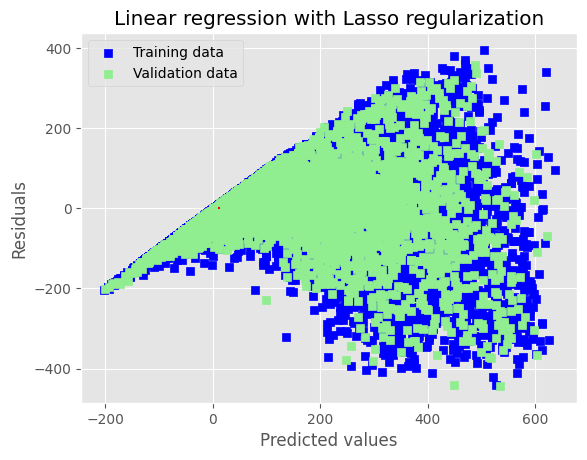

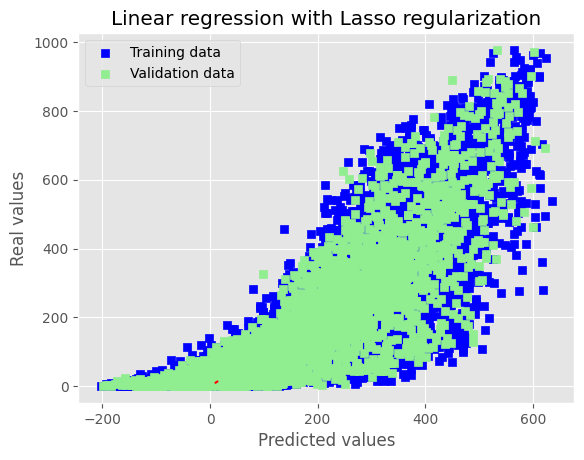

Lasso picked 55 features and eliminated the other 2 features


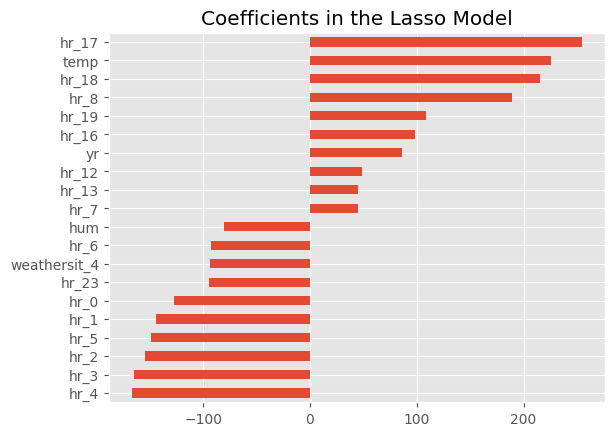

In [ ]:
# Plot residuals
plt.scatter(y_train_las, (y_train_las - y_train_array), c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test_array, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train_array, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_array, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model");

In [ ]:
lasso.coef_

array([  85.85743086,  -20.50180296,    6.83606566,  225.54973599,
        -80.46680559,  -37.70690278,  -44.5248093 ,  -10.27134504,
        -14.14705287,   23.99183803,  -10.38175338,    6.15364989,
        -21.56056714,  -17.70408273,   -8.09256786,    4.46259409,
          0.95496079,   12.72734262,    0.        ,  -20.50031285,
         -3.34651153,   24.85745132, -127.30923658, -144.17788363,
        -16.12889644,    6.59423839,   49.21637029,   44.68326006,
         23.55858206,   32.61726641,   98.27913441,  255.089524  ,
        215.12522026,  108.71741393, -154.5347121 ,   32.5984073 ,
        -17.59295458,  -55.12667778,  -94.21102278, -164.61479886,
       -166.99410903, -149.01385656,  -92.29694612,   44.68174963,
        189.02348211,   37.12075058,   -4.73346008,   -2.92570285,
         -1.52979846,    0.30021142,    0.        ,    4.6508006 ,
         11.50141498,   27.81593404,   16.33645197,  -37.47583897,
        -93.84036012])

#### Ridge regression

In [ ]:
from sklearn.linear_model import RidgeCV, Ridge

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 0.6


In [ ]:
ridge = Ridge(alpha=0.6)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


R-sq: 0.681083233836763
MSE: 10098.630582651485
RMSE: 100.49194287429955


In [ ]:
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

In [ ]:
y_train.shape, y_train_rdg.shape, y_test.shape, y_test_rdg.shape

((13903, 1), (13903, 1), (3476, 1), (3476, 1))

In [ ]:
X_train.columns.shape

(57,)

In [ ]:
ridge_coef = ridge.coef_.reshape((57,))

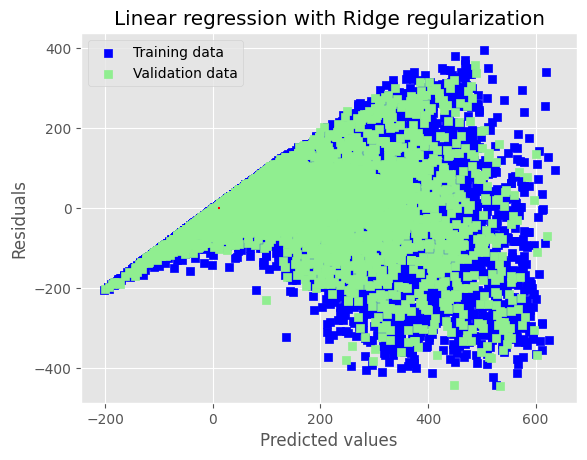

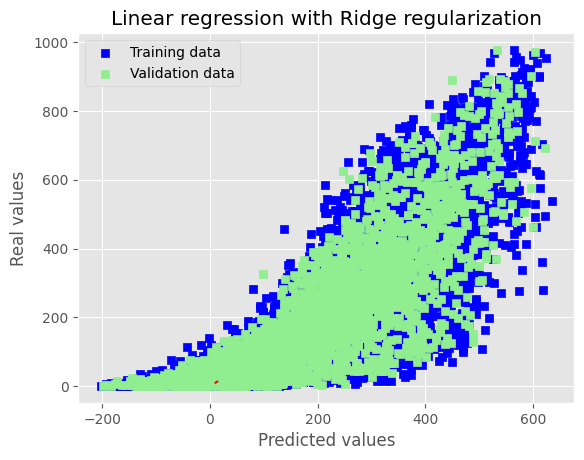

Ridge picked 57 features and eliminated the other 0 features


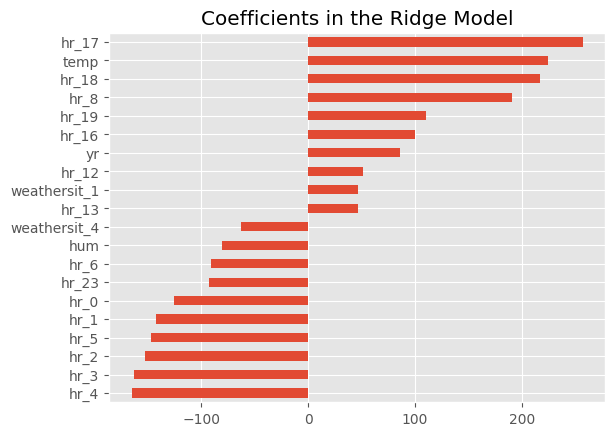

In [ ]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge_coef, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model");

#### Elasticnet regression

In [ ]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006,
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6],
                           max_iter = 10000, cv = 10)
elasticNet.fit(X_train, y_train_array)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

In [ ]:
enet = ElasticNet(alpha=0.0001, l1_ratio=0.1, max_iter = 10000)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R-sq: 0.681125544962047
MSE: 10097.290783465254
RMSE: 100.48527645115604


In [ ]:
y_train_ela = enet.predict(X_train)
y_test_ela = enet.predict(X_test)

In [ ]:
y_train.shape, y_train_ela.shape, y_test.shape, y_test_ela.shape

((13903, 1), (13903,), (3476, 1), (3476,))

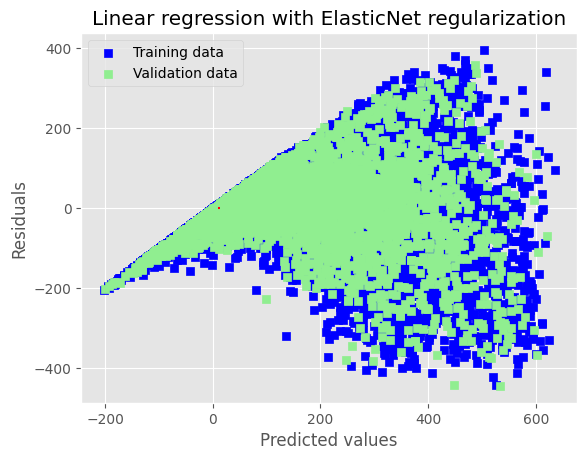

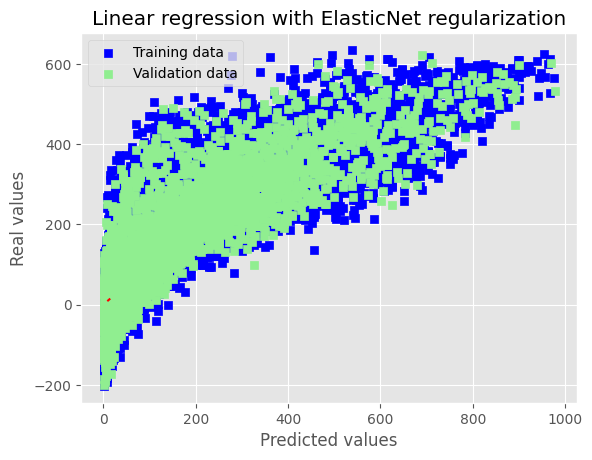

ElasticNet picked 57 features and eliminated the other 0 features


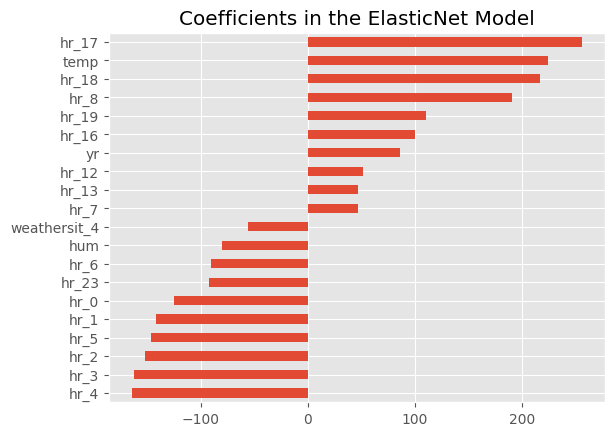

In [ ]:
# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train_array, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test_array, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model");

### Determining if there is a reduction in error if two target variables are considered

Considering (`Casual, Registered`) as target and finding the error by implementing Linear Regression model from sklearn

In [ ]:
df3 = df.copy()

In [ ]:
df3.drop(['instant','atemp','dteday','cnt'],axis=1,inplace=True)

In [ ]:
target_df3 = df3[['casual','registered']]
features_df3 = df3.drop(['casual','registered'], axis=1)

In [ ]:
target_df3.head()

casual  registered
0       3          13
1       8          32
2       5          27
3       3          10
4       0           1

In [ ]:
features_df3.head()

season  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1   0        0        6           0           1  0.24  0.81   
1       1   0     1   1        0        6           0           1  0.22  0.80   
2       1   0     1   2        0        6           0           1  0.22  0.80   
3       1   0     1   3        0        6           0           1  0.24  0.75   
4       1   0     1   4        0        6           0           1  0.24  0.75   

   windspeed  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [ ]:
df3['weekday'] = df3['weekday'].astype(str)
df3['season'] = df3['season'].astype(str)
df3['yr'] = df3['yr'].astype(int)
df3['mnth'] = df3['mnth'].astype(str)
df3['hr'] = df3['hr'].astype(int)
df3['holiday'] = df3['holiday'].astype(str)
df3['workingday'] = df3['workingday'].astype(int)
df3['weathersit'] = df3['weathersit'].astype(str)

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_df, target_df3, test_size=0.20, random_state=42, shuffle=True)

In [ ]:
X_train_1.shape, y_train_1.shape

((13903, 57), (13903, 2))

In [ ]:
lr1 = LinearRegression()
lr1.fit(X_train_1, y_train_1)
pred_1 = lr1.predict(X_test_1)
print('predicted data', pred_1)
print('Mean Absolute Error:', mean_absolute_error(y_test_1, pred_1))
print('Mean Squared Error:', mean_squared_error(y_test_1, pred_1))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test_1, pred_1)))

predicted data [[109.4375 351.5   ]
 [ 28.4375 137.5   ]
 [ -8.3125  11.5   ]
 ...
 [ 48.375   44.5   ]
 [ 60.9375 140.5   ]
 [ 11.1875 246.5   ]]
Mean Absolute Error: 41.63981588032221
Mean Squared Error: 4068.7644529002446
Mean Root Squared Error: 63.786867401529015


In [ ]:
print('Coefficient of Determination:', r2_score(y_test_1, pred_1))

Coefficient of Determination: 0.6297402132856353


Comments: Taking 2 target variables reduces the error, but the R2 score of Linear Regression model also decreases

### Report Analysis

* Interpretation of the methods that are used to implement linear regression - Linear regression has high variance in the coefficients if both categorical & numerical features are there which can lead to overfit in future but regularization helps to control this.

* Performance of the algorithms/methods used - Performance of the algorithms are not good fits but decent enough to plan the bike distribution and monitor the events. To get better performance we need to get more data or eliminate outliers or noise from the existing data set


* Nature of the data and fitment of linear regression for this data -  R2 of 60% reveals that 60% of the data fit the regression model. Generally, a higher r-squared indicates a better fit for the model.

* Future Scope - We can use Bacth Gradient Descent and SGD Regressor to perform Linear Regression. We can try to perform a non-linear curve fitting using linear regression by using Feature Engineering to get a good fit.